# CIRRHOSIS LIVER DISEASE ANALYSIS

CONTEXT

AIM : THE AIM OF THIS DISEASE ANALYSIS IS TO DETERMINE THE VARIOUS FACTORS THAT LEAD TO THE CIRRHOSIS OF THE LIVER 


The liver performs several crucial functions: 
- it filters toxins from the blood, 
- metabolizes drugs, stores energy,
- fights infections, and helps with digestion. 


This football-sized organ is incredibly resilient, with the ability to repair and regenerate itself in order to continue performing its necessary functions.

That being said, your largest internal organ isn’t invincible. A liver that is constantly working too hard can end up with liver damage; repeated liver damage can lead to liver disease. While the liver may be able to heal itself in the early stages of disease, the damage will become progressively worse and irreversible over time.










Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism. The following data contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984. source

418 PBC patients participated in randomized placebo-controlled trial of the drug D-penicillamine


312 cases participated in the randomized trial


106 cases did not participate in the clinical trial (6 of the original 112 were lost)





The dataset consists of following columns :

1. ID: unique identifier [id]

2. N_Days: number of [days] between registration and the earlier of death, transplantation, or study analysis time in July 1986

3. Status: status of the patient [C, CL, or D] C (censored), CL (censored due to liver tx), or D (death)

4. Drug: type of drug [D-penicillamine or placebo]

5. Age: age in [days]

6. Sex: [M or F] M (male) or F (female)

7. Ascites: presence of ascites [N or Y] N (No) or Y (Yes)

8. Hepatomegaly: presence of hepatomegaly [N or Y] N (No) or Y (Yes)

9. Spiders: presence of spiders [N or Y] N (No) or Y (Yes)

10. Edema: presence of edema [N, S, or Y] N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)




.... we have the presence of the following serum in a patient blood level below which will help in determining the chances of liver cirrhosis in a patient





11. Bilirubin: serum bilirubin in [mg/dl]

12. Cholesterol: serum cholesterol in [mg/dl]

13. Albumin: albumin in [gm/dl]

14. Copper: urine copper in [ug/day]

15. Alk_Phos: alkaline phosphatase in [U/liter]

16. SGOT: SGOT in [U/ml]

17. Triglycerides: triglicerides in [mg/dl]

18. Platelets: platelets per cubic [ml/1000]

19. Prothrombin: prothrombin time in seconds [s]

20. Stage: histologic stage of disease [1, 2, 3, or 4]


    
    
reference for my project: https://www.kaggle.com/code/arjunbhaybhang/liver-cirrhosis-prediction-with-xgboost-eda

data site

# Import our libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# read the dataset

In [2]:
cirrhosis = pd.read_csv('cirrhosis.csv')

In [3]:
cirrhosis.shape

(418, 20)

In [4]:
cirrhosis.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [5]:
cirrhosis.tail()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,418,976,C,NaN,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


# data cleaning

*Checking for missing values*

In [6]:
cirrhosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [7]:
cirrhosis.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [8]:
##converted our age from days to years 

In [9]:
cirrhosis['Age'] = (cirrhosis['Age']/365).round(1)

In [10]:
cirrhosis

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58.8,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56.5,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70.1,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,54.8,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38.1,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,67.0,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,39.0,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,57.0,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,58.0,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


# in this dataset we have both numerical and categorical variable containing missing value, to work on this data we have to eliminate or fill in the missing values

1. numerical variable :we fill in our numerical values using mean or median and our numerical variables mostly are of the datatype  floats and intergers 
2. categorical variable :we fill inour categorical variable using using our mode that is the most frequent occuring class and this variables are object  datatype

 **observation**
 
 
this is our numerical variables :
    'N_Days', 'Age', 'id, 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin'stage

**observation**


categorical variable:  , 'Status', 'Drug', , 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema',  

# grouping the numerical variables 

In [11]:
cirrhosis.select_dtypes(include=(['int64', 'float64'])).isna().sum()

ID                 0
N_Days             0
Age                0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [12]:
num_cols = cirrhosis.select_dtypes(include = (['int64','float64'])).columns
for i in num_cols:
    cirrhosis[i].fillna(cirrhosis[i].median(), inplace=True)

In [13]:
nums_cols= cirrhosis.select_dtypes(include=(['int64', 'float64'])).isna().sum()

In [14]:
nums_cols

ID               0
N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

# categorical variables

In [15]:
cirrhosis.select_dtypes(include=(['object'])).isna().sum()

Status            0
Drug            106
Sex               0
Ascites         106
Hepatomegaly    106
Spiders         106
Edema             0
dtype: int64

In [16]:
cat_col = cirrhosis.select_dtypes(include=('object')).columns
for i in cat_col:
    
    cirrhosis[i].fillna(cirrhosis[i].mode().values[0], inplace=True)
    
cirrhosis.select_dtypes(include=('object')).isna().sum()

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

In [17]:
cat_col = cirrhosis.select_dtypes(include=('object')).isna().sum()
cat_col

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

# data visualization 
liver has 4 histlogical stages of disease 
1. inflammaton 
2. fibrosis
3. cirrhosis
4. liver failure

In [18]:
cirrhosis['Stage'].value_counts()

3.0    161
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64

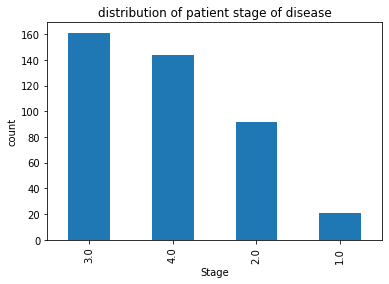

In [19]:
target ='Stage' 
cirrhosis['Stage' ].value_counts().plot(kind = 'bar')
plt.title('distribution of patient stage of disease')
plt.xlabel('Stage')
plt.ylabel ('count')
plt.show()

**observation**

1. from our bar chart , we can observe that we have individual at the 3rd level of the liver disease which is the cirrhosis stage 

2. Cirrhosis refers to severe, irreversible scarring of the liver, 

3. During this stage of disease, symptoms become more noticeable: pain and discomfort, fatigue, appetite loss, fluid retention, jaundice, and an itchy feeling around the liver

In [20]:
##we want to group all our dataset into 2 stages cirrhosis and no cirrhosis
# 1 represents cirhhosis while 0 represents no cirrhosis

In [21]:
cirrhosis.loc[cirrhosis['Stage'].isin([1,2,4]), 'Stage'] = 0
cirrhosis.loc[cirrhosis['Stage'].isin([3]), 'Stage'] = 1

In [22]:
cirrhosis

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58.8,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,0.0
1,2,4500,C,D-penicillamine,56.5,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,1.0
2,3,1012,D,D-penicillamine,70.1,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,0.0
3,4,1925,D,D-penicillamine,54.8,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,0.0
4,5,1504,CL,Placebo,38.1,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,D-penicillamine,67.0,F,N,Y,N,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,1.0
414,415,1103,C,D-penicillamine,39.0,F,N,Y,N,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,0.0
415,416,1055,C,D-penicillamine,57.0,F,N,Y,N,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,1.0
416,417,691,C,D-penicillamine,58.0,F,N,Y,N,N,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,1.0


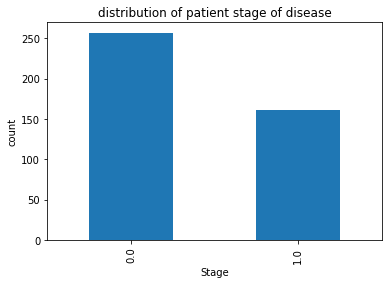

In [23]:
target ='Stage' 
cirrhosis['Stage' ].value_counts().plot(kind = 'bar')
plt.title('distribution of patient stage of disease')
plt.xlabel('Stage')
plt.ylabel ('count')
plt.show()

<AxesSubplot:xlabel='Stage', ylabel='Age'>

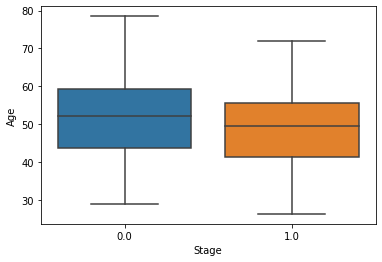

In [24]:
sns.boxplot(x="Stage",y="Age", data=cirrhosis)

**observation**
1. we have a very close median between the age of people with cirrhosis and without cirrhosis. it will be very difficult from our plot to determine the age grade of people that responded positive to liver cirrhosis from our clinical trial 


In [25]:
cirrhosis.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,209.500000,1917.782297,50.767703,3.220813,350.272727,3.497440,91.279904,1799.144976,120.564067,119.267943,256.866029,10.731100,0.385167
std,120.810458,1104.672992,10.453390,4.407506,193.123893,0.424972,74.485481,1875.121982,49.085094,54.050691,97.024861,1.019587,0.487218
min,1.000000,41.000000,26.300000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,0.000000
25%,105.250000,1092.750000,42.850000,0.800000,273.000000,3.242500,51.250000,1016.250000,91.000000,95.000000,190.000000,10.000000,0.000000
50%,209.500000,1730.000000,51.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,0.000000
75%,313.750000,2613.500000,58.275000,3.400000,347.750000,3.770000,100.750000,1707.750000,135.750000,127.750000,315.500000,11.100000,1.000000
max,418.000000,4795.000000,78.500000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,1.000000


*observation*
1. from our dataset, the minimum age of our patient is 26 while the maximum age is 78 

we would classify our patients age group ino youths. middle aged and aged patients  to help us better understand the age distribution of the patients 

In [26]:
def bin_age (x):
    if x< 30:
        return"youth"
    if x>=30 and x<59:
        return "middle aged"
    if x>=60:
        return"aged"

In [27]:
cirrhosis["Age_group"]=cirrhosis["Age"].apply(lambda x: bin_age(x))

In [28]:
cirrhosis.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_group
0,1,400,D,D-penicillamine,58.8,F,Y,Y,Y,Y,...,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,0.0,middle aged
1,2,4500,C,D-penicillamine,56.5,F,N,Y,Y,N,...,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,1.0,middle aged
2,3,1012,D,D-penicillamine,70.1,M,N,N,N,S,...,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,0.0,aged
3,4,1925,D,D-penicillamine,54.8,F,N,Y,Y,S,...,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,0.0,middle aged
4,5,1504,CL,Placebo,38.1,F,N,Y,Y,N,...,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,1.0,middle aged


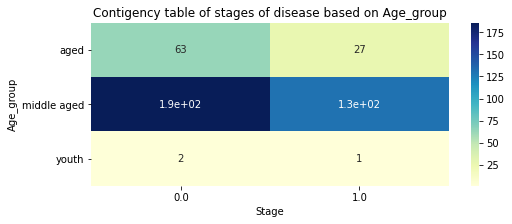

In [29]:
contigency_pct = pd.crosstab(cirrhosis["Age_group"], cirrhosis['Stage'])
fig = plt.figure(figsize=(8,3))
plt.title('Contigency table of stages of disease based on Age_group')
sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")
fig.savefig('heatmap.jpg', dpi=300)
plt.show()

In [30]:
contigency_pct

Stage,0.0,1.0
Age_group,,
aged,63,27
middle aged,186,131
youth,2,1


**observation** 
1.  out of the 90 aged people that conducted the test for liver cirrhosis , 70% of them of them live without the disease while 30% are living with liver cirrhoiss

2. out 0f the 320 middled aged people that participated in our test ,58% came out negative to liver cirrhosis while 41% came out positive to liver cirrhosis 

3. out 0f the 3 youths that came for the test , 66% came out negative while 33% came out positive 

4. from our data we can conclude that middle aged individuals that is from 30 to 60 years  are more prone to the liver,Those with cirrhosis are also more susceptible to developing liver cancer. 


<AxesSubplot:xlabel='Sex', ylabel='Count'>

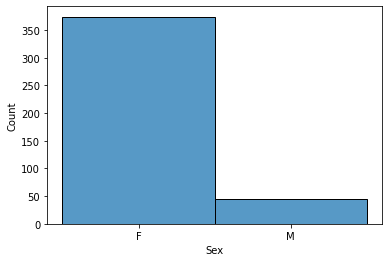

In [31]:
sns.histplot(x="Sex",data=cirrhosis)

**observation**
1. most of our trial were conducted on females 

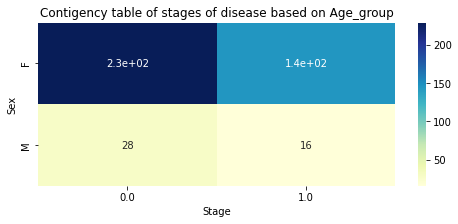

In [32]:
contigency_pct = pd.crosstab(cirrhosis["Sex"], cirrhosis['Stage'])
fig = plt.figure(figsize=(8,3))
plt.title('Contigency table of stages of disease based on Age_group')
sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")
fig.savefig('heatmap.jpg', dpi=300)
plt.show()

In [33]:
contigency_pct

Stage,0.0,1.0
Sex,,
F,229,145
M,28,16


**observation**
1. out of the 374 females 61% responded negative to liver cirrhosis while 38 % responded positive to it
2. out of the 44 males 63% responded negative to liver cirrhosis while 36% responded positive

from our analysis , we can conclude that liver cirrhosis is more prevalent in females than males

In [34]:
cat_col

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

Text(0.5, 1.0, 'presence of Edema across disease Stages')

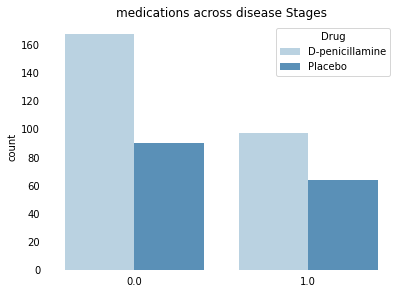

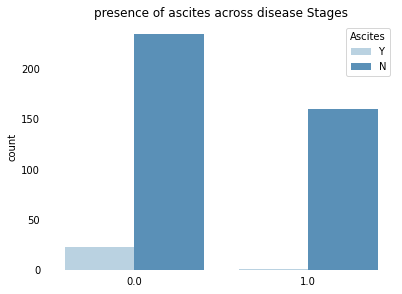

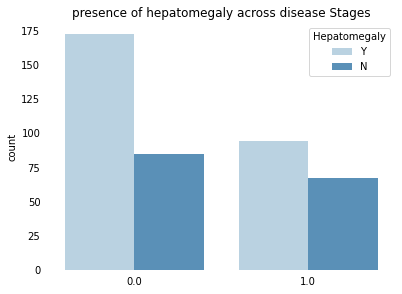

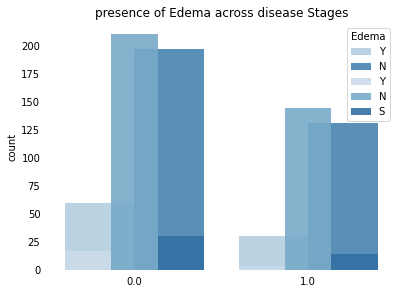

In [35]:
plt.figure(figsize=(21.2,10))

plt.subplot(2,3,1)
sns.countplot(x=cirrhosis['Stage'], hue=cirrhosis['Drug'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('medications across disease Stages')


plt.figure(figsize=(21.2,10))

plt.subplot(2,3,2)
sns.countplot(x=cirrhosis['Stage'], hue=cirrhosis['Ascites'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('presence of ascites across disease Stages')

plt.figure(figsize=(21.2,10))

plt.subplot(2,3,3)
sns.countplot(x=cirrhosis['Stage'], hue=cirrhosis['Hepatomegaly'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('presence of hepatomegaly across disease Stages')

plt.figure(figsize=(21.2,10))

plt.subplot(2,3,4)
sns.countplot(x=cirrhosis['Stage'], hue=cirrhosis['Spiders'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('presence of spiders across disease Stages')


plt.subplot(2,3,4)
sns.countplot(x=cirrhosis['Stage'], hue=cirrhosis['Edema'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('presence of Edema across disease Stages')

In [36]:
nums_cols

ID               0
N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

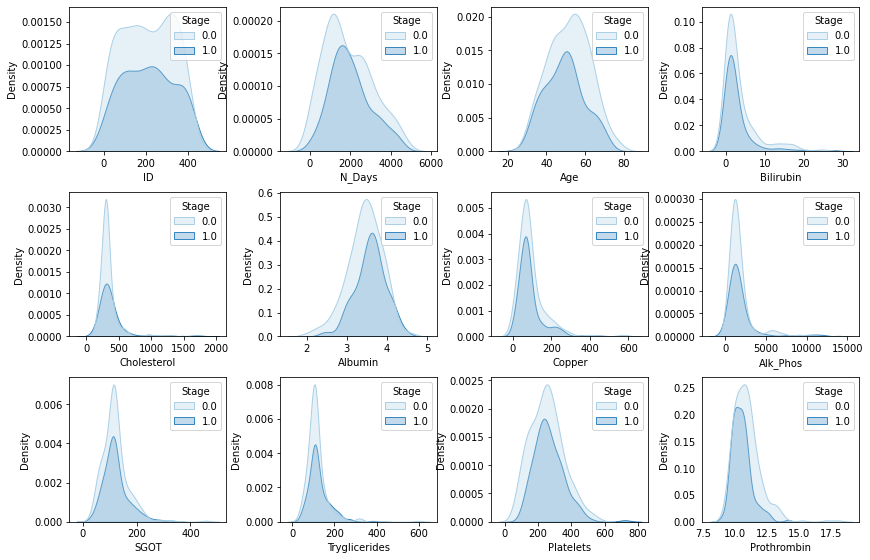

In [37]:
fig, axes= plt.subplots(3,4, figsize = (12,8))
fig.tight_layout(pad = 2.0)
target = 'Stage'
idx = 0 

for i in range(3):
    for j in range(4):
        sns.kdeplot(x = num_cols[idx], hue = target ,  data = cirrhosis , alpha = 0.3, ax = axes[i,j],fill=True, palette='Blues', common_norm=True)
        plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
        idx = idx+1

**observation**
1. from earlier analysis we already observed that age has a positive correlation to our disease stages , the older you get the higer the probabilty of having cirrhosis
2. albumin,platelets,cholesterol and tryglicerides has a negative correlaton with the disease stages , the lower the accumulation of this serum in a patient blood level the higher the chances of cirrhosis
3. bilirubin,copper and prothrombin has a postive correlation with disease stage , the higher the accumulation of this serum in a patient blood level the higher the chance of cirrhosis


. we further explained this using a regplot below  showing this probabilities 

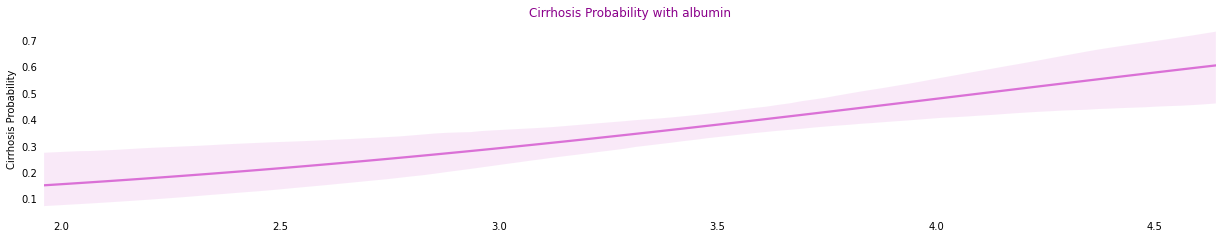

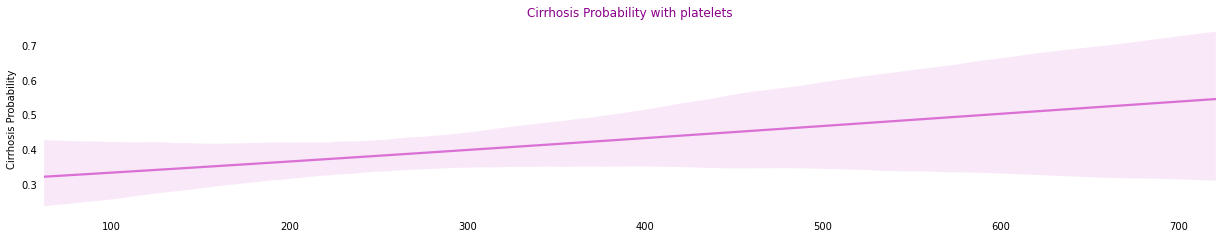

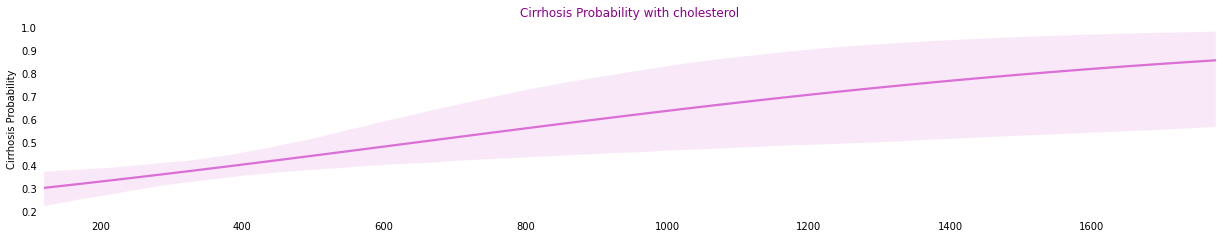

In [56]:
plt.figure(figsize=(21,12))

plt.subplot(3,1,1)
sns.regplot(x=cirrhosis['Albumin'], y=cirrhosis['Stage'], scatter=False, logistic=True, color='orchid')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with albumin'), color='darkmagenta');


plt.figure(figsize=(21,12))

plt.subplot(3,1,2)
sns.regplot(x=cirrhosis['Platelets'], y=cirrhosis['Stage'], scatter=False, logistic=True, color='orchid')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with platelets'), color='darkmagenta');

plt.figure(figsize=(21,12))

plt.subplot(3,1,3)
sns.regplot(x=cirrhosis['Cholesterol'], y=cirrhosis['Stage'], scatter=False, logistic=True, color='orchid')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with cholesterol'), color='darkmagenta');




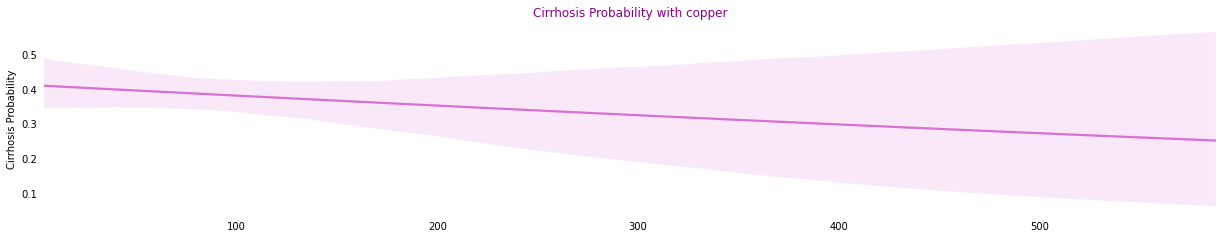

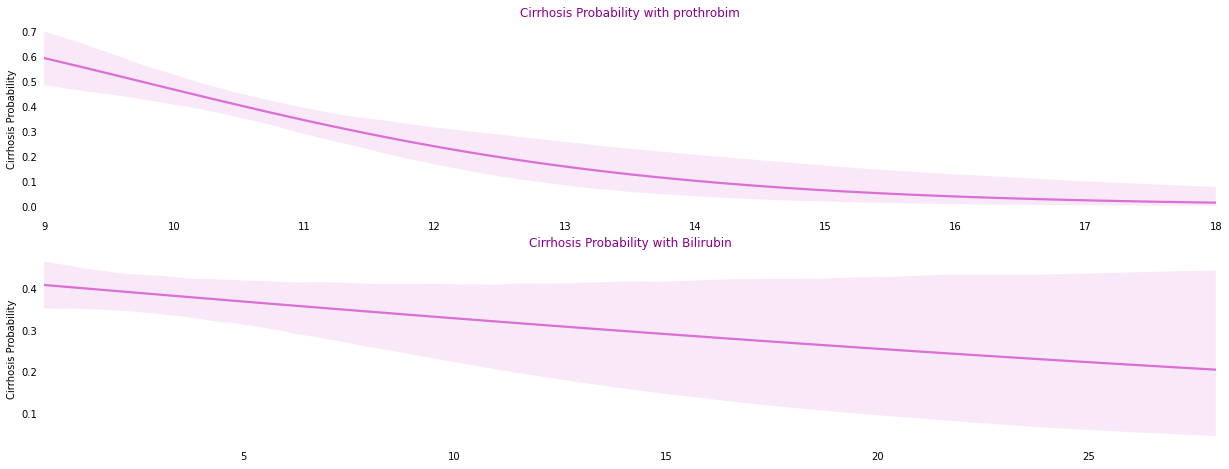

In [60]:
plt.figure(figsize=(21,12))

plt.subplot(3,1,1)
sns.regplot(x=cirrhosis['Copper'], y=cirrhosis['Stage'], scatter=False, logistic=True, color='orchid')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with copper'), color='darkmagenta');

plt.figure(figsize=(21,12))

plt.subplot(3,1,2)
sns.regplot(x=cirrhosis['Prothrombin'], y=cirrhosis['Stage'], scatter=False, logistic=True, color='orchid')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with prothrobim'), color='darkmagenta');


plt.subplot(3,1,3)
sns.regplot(x=cirrhosis['Bilirubin'], y=cirrhosis['Stage'], scatter=False, logistic=True, color='orchid')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with Bilirubin'), color='darkmagenta');